### Imports

In [1]:
import sys
sys.path.insert(0, "..")
from utils.dataset_utils import OriginalDataset, plot_image_array, plot_delta

# Standard Downloads
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
original_dataset = OriginalDataset('../datasets/droid_100_sample_pictures')
len_ = (original_dataset.__len__())
print(len_)

166


(180, 320, 3)


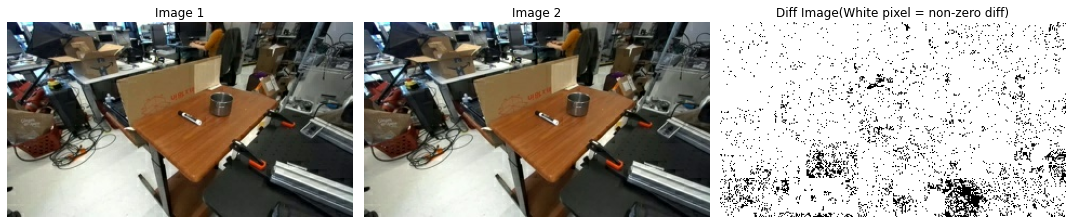

In [80]:
image1 = original_dataset[0]
image2 = original_dataset[1]
image1 = np.array(image1, dtype = np.int16)
image2 = np.array(image2, dtype = np.int16)
image1
non_zero_diff_count, image3 = plot_delta(image2 - image1)
# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
print(image1.shape)
# Plot each image
axes[0].imshow(image1)
axes[0].set_title('Image 1')
axes[0].axis('off')  # Turn off axis labels

axes[1].imshow(image2)
axes[1].set_title('Image 2')
axes[1].axis('off')

axes[2].imshow(image3, cmap="gray")
axes[2].set_title('Diff Image(White pixel = non-zero diff)')
axes[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

Traversing strategy:

Row by Row, Left to Right

In [71]:
non_zero_diff_count

52461

In [72]:
image1[0][0]

array([26, 28, 53], dtype=int16)

In [73]:
image2[0][0]

array([23, 28, 58], dtype=int16)

In [74]:
image1[0][0] - image2[0][0]

array([ 3,  0, -5], dtype=int16)

### Original Image Storage

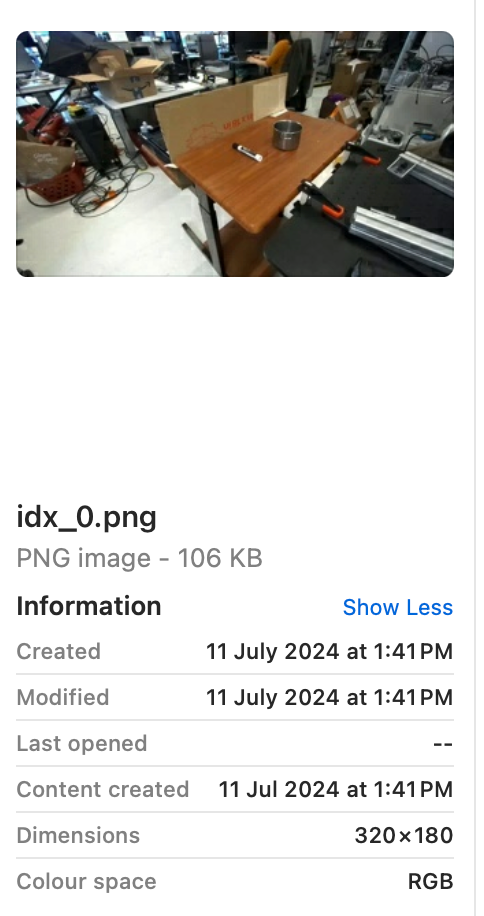

In [75]:
# origina image size in file system

import os
path_img = '../datasets/droid_100_sample_pictures/idx_1.png'
size_in_bytes = os.path.getsize(path_img)
kb_size = size_in_bytes/(10**3)
print('kb size: ', kb_size)


kb size:  106.715


In [76]:
num_pixels = image1.shape[0]* image1.shape[1] 
bit_size = num_pixels * image1.shape[2] * 8
Kb_size = bit_size / (10 ** 3)
print(f"Original Image Storage({bit_size} / (10 ** 3) = ", Kb_size)

Original Image Storage(1382400 / (10 ** 3) =  1382.4


### Compressed Image Storage

In [77]:
# a single bit for every pixel location, where 1 represents there is a diff
bit_map_storage = image1.shape[0]* image1.shape[1]
sparse_representation_bit_size = non_zero_diff_count * 3 * 8

total_mb_size = (bit_map_storage + sparse_representation_bit_size) / (10 ** 6)
print(f"Compressed Image Storage({bit_map_storage} + {sparse_representation_bit_size} / (10 ** 6)) = ", total_mb_size)

Compressed Image Storage(57600 + 1259064 / (10 ** 6)) =  1.316664


## save the diff image as png
saving the fig as a png compresses only upto 83.1kB from 106kB

In [78]:
import matplotlib.pyplot as plt
import numpy as np
diff_img = np.array(image2 - image1, dtype=np.float32)
diff_img.shape
plt.imsave("diff_2_1.png", diff_img)

ValueError: Floating point image RGB values must be in the 0..1 range.

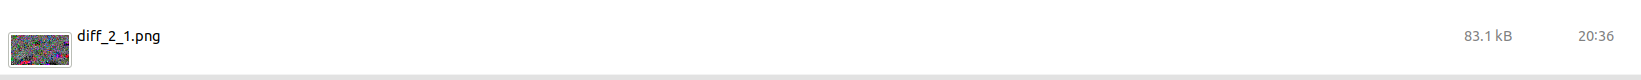

In [79]:
from collections import Counter
flattened_diff = diff_img.flatten()
freq = sorted(Counter(flattened_diff).items())
freq

[(-16.0, 3),
 (-15.0, 3),
 (-14.0, 7),
 (-13.0, 18),
 (-12.0, 20),
 (-11.0, 37),
 (-10.0, 110),
 (-9.0, 181),
 (-8.0, 415),
 (-7.0, 817),
 (-6.0, 1577),
 (-5.0, 2919),
 (-4.0, 5654),
 (-3.0, 10455),
 (-2.0, 17595),
 (-1.0, 26736),
 (0.0, 35588),
 (1.0, 28116),
 (2.0, 18647),
 (3.0, 11097),
 (4.0, 6221),
 (5.0, 3197),
 (6.0, 1601),
 (7.0, 907),
 (8.0, 449),
 (9.0, 209),
 (10.0, 116),
 (11.0, 54),
 (12.0, 21),
 (13.0, 13),
 (14.0, 10),
 (15.0, 5),
 (16.0, 2)]

In [44]:
## search where the larger values exist in the image

image1[0][0]

array([26., 28., 53.], dtype=float32)

In [45]:
image2[0][0]

array([23., 28., 58.], dtype=float32)

In [46]:
image2[0][0] - image1[0][0]

array([-3.,  0.,  5.], dtype=float32)

SyntaxError: unexpected EOF while parsing (266361228.py, line 9)